In [29]:
import librosa
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Example usage
audio_path = r'FER\audio\Anger\Anger-Actor_01-4.wav'

In [103]:
labels = ['Neutral','Disgust','Fear','Sadness', 'Anger', 'Happiness', 'Surprise']

# Tempo

In [79]:
def plot_tempo(audio_file_path,label):
    # Load audio file
    y, sr = librosa.load(audio_file_path)

    # Estimate tempo
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

    # Plot onset envelope and tempo
    plt.figure(figsize=(12, 6))

    # Plot onset envelope
    plt.subplot(2, 1, 1)
    plt.plot(librosa.times_like(onset_env), onset_env, label='Onset Strength')
    plt.title('Onset Envelope')
    plt.legend()

    # Plot tempo
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y, sr=sr, alpha=0.6)
    plt.vlines(librosa.times_like(onset_env), 0, y.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.title(f'{label} -Tempo: {tempo:.2f} BPM')
    plt.legend()

    plt.tight_layout()
    plt.show()


# CODE FOR PITCH

In [46]:
def plot_pitch(audio_path,label, frame_size=2048, hop_size=512, sr=22050):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Calculate the short-time Fourier transform (STFT)
    D = librosa.stft(y, n_fft=frame_size, hop_length=hop_size)

    # Calculate the magnitude spectrum
    magnitude = np.abs(D)
    
    # Find the index of the maximum magnitude in each frame
    max_magnitude_index = np.argmax(magnitude, axis=0)
    
    # Convert the index to frequency in Hz
    frequencies = librosa.core.fft_frequencies(sr=sr, n_fft=frame_size)
    pitch_freqs = frequencies[max_magnitude_index]

    # Convert frequency to pitch in Hz
    pitch = librosa.hz_to_midi(pitch_freqs)
    print(pitch.shape)
    
     # Plot the pitch
    times = librosa.times_like(pitch, sr=sr, hop_length=hop_size)
    plt.figure(figsize=(12, 6))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(times, pitch, label='Pitch (Hz)', color='r', linewidth=2)
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.title('Pitch Detection '+label)
    plt.legend()
    plt.show()

# CODE FOR CHROMA

In [ ]:
import numpy as np

def plot_chroma_pitch(audio_path, sr=22050, n_chroma=12):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)

    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
    # Plot the chroma feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')
    plt.show()

    # Find the index of the maximum chroma in each frame
    max_chroma_index = np.argmax(chroma, axis=0)

    # Convert the index to pitch in Hz
    pitch = librosa.core.note_to_hz(librosa.midi_to_note(max_chroma_index))
    print("Pitch values (in Hz):", pitch.shape)
    # Plot the pitch
    times = librosa.times_like(pitch, sr=sr, hop_length=512)
    plt.figure(figsize=(12, 6))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(times, pitch, label='Pitch (Hz)', color='r', linewidth=2)
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.title('Pitch Detection')
    plt.legend()
    plt.show()

# CODE FOR MFCC

In [57]:
def plot_mfcc(audio_path,label, sr=22050, n_mfcc=13):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Plot the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', cmap='viridis')
    plt.title('MFCCs '+label)
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficient')
    plt.show()


# Amplitude

In [55]:
def plot_amplitude(audio_path,label):
    # Load the audio file
    y, sr = librosa.load(audio_path)

    # Compute the amplitude envelope
    amplitude_envelope = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot the amplitude envelope
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(amplitude_envelope, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of Amplitude'+label)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

(216,)


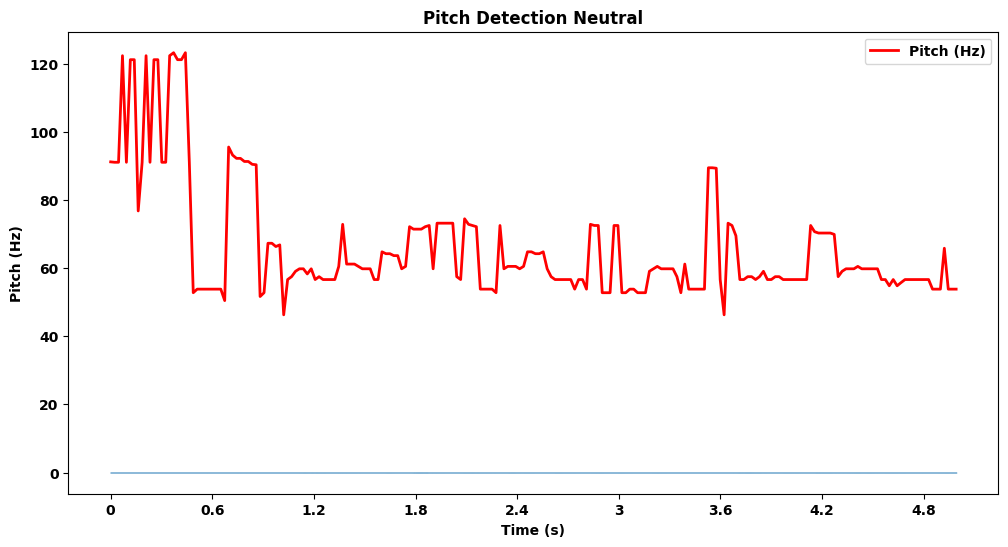

(216,)


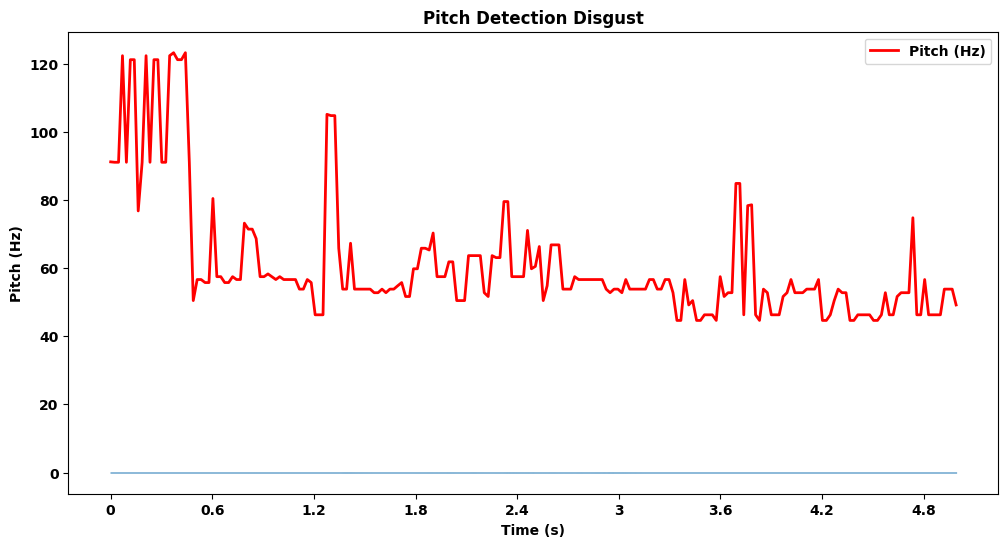

(216,)


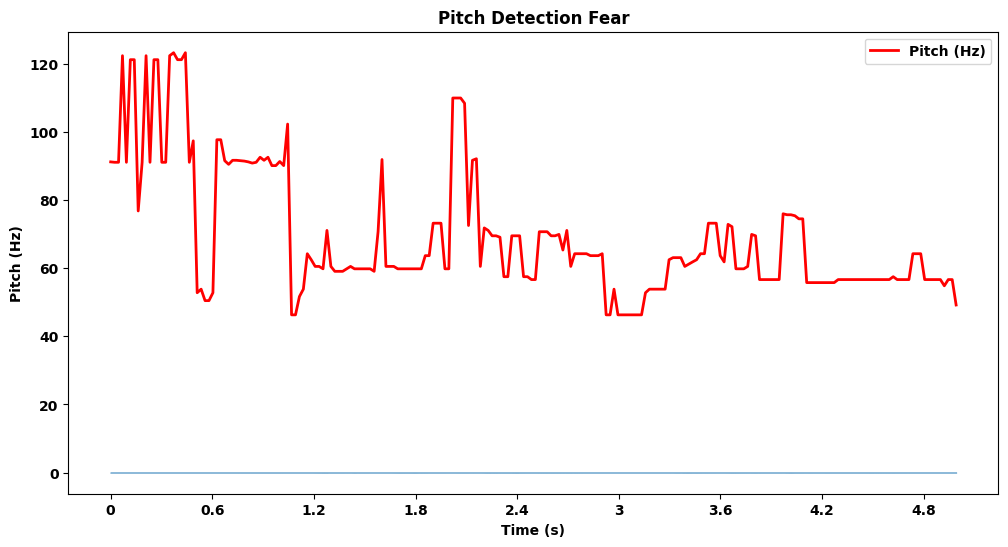

(216,)


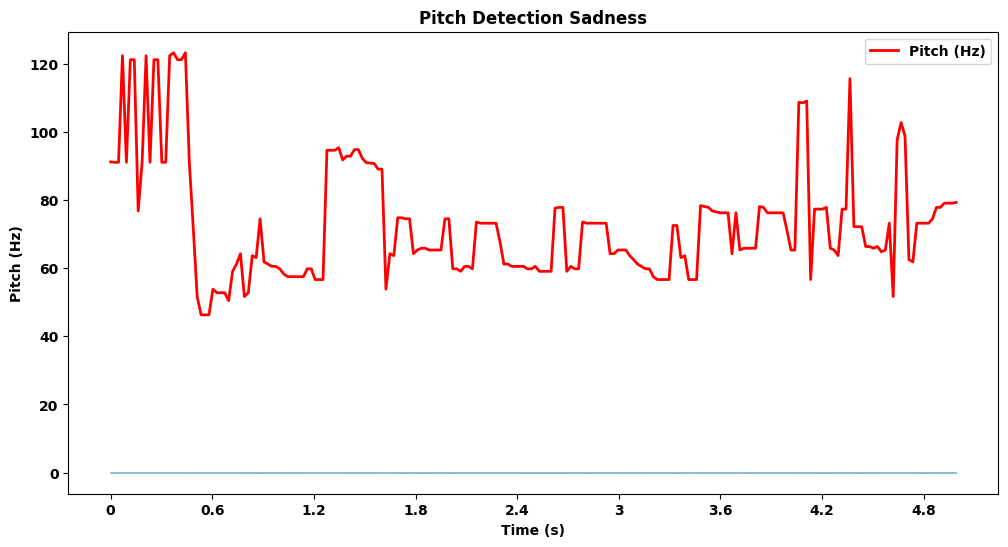

(216,)


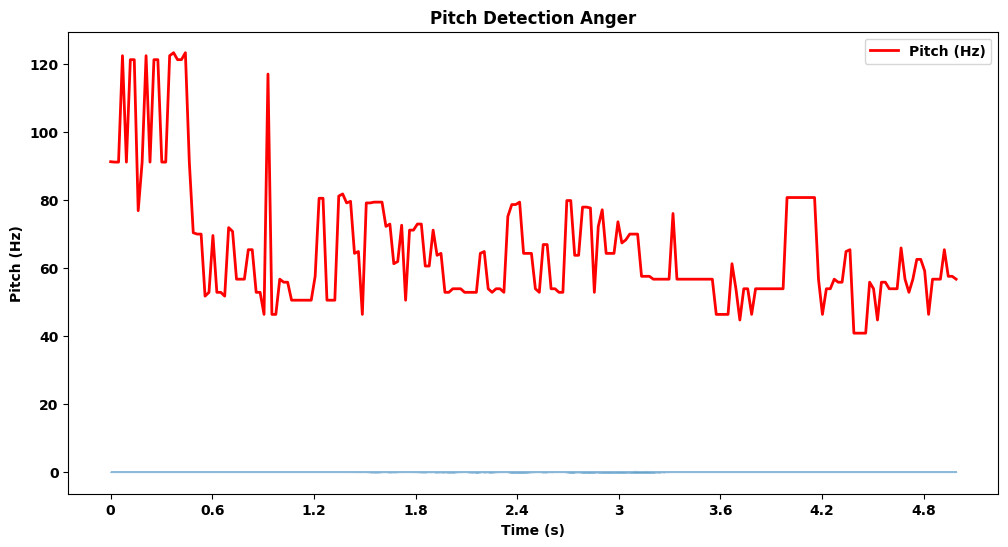

(216,)


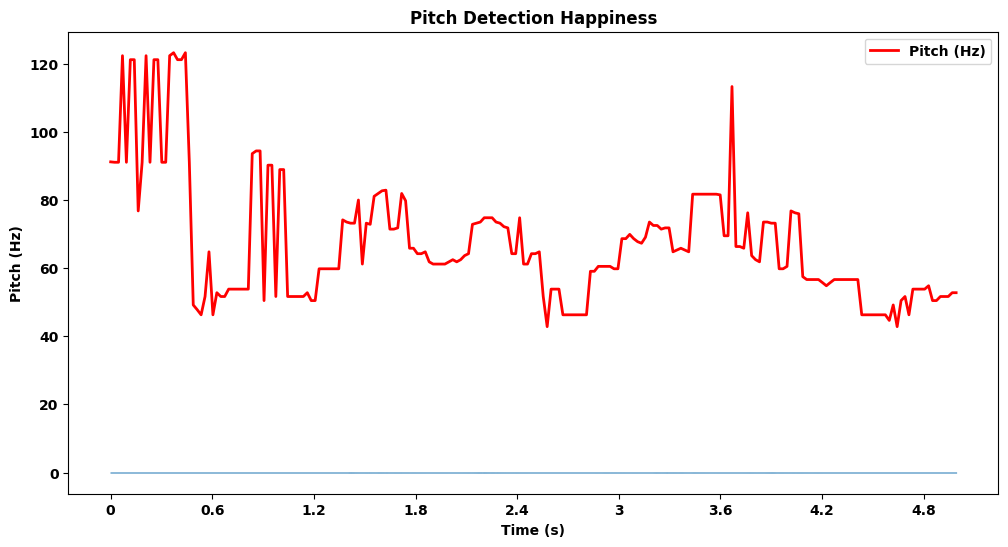

(216,)


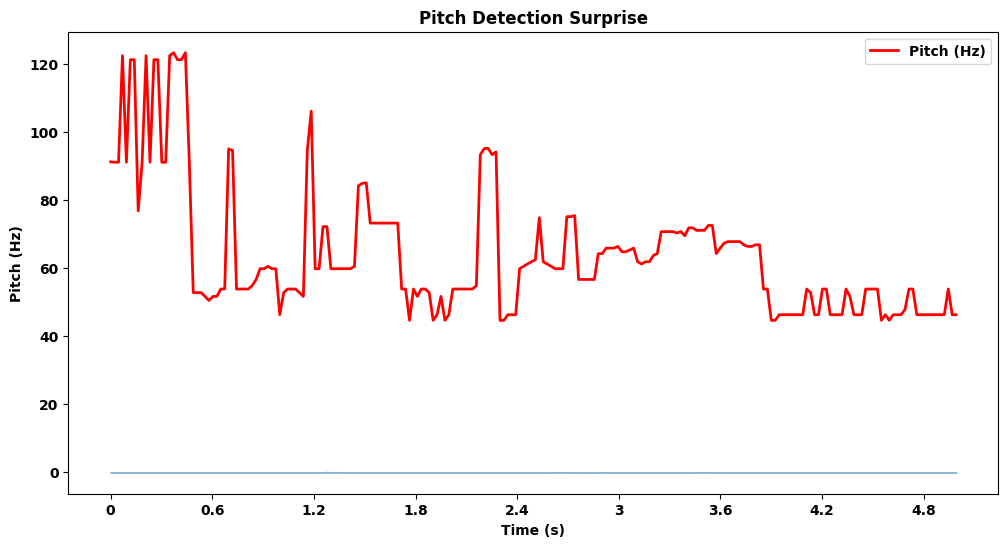

In [108]:
import os
audio_path=os.path.join('FER','audio')

for label in labels:
    for audio in os.listdir(os.path.join(audio_path,label))[-10:-1]:
        path=os.path.join(audio_path,label,audio)
        plot_pitch(path,label)
        break

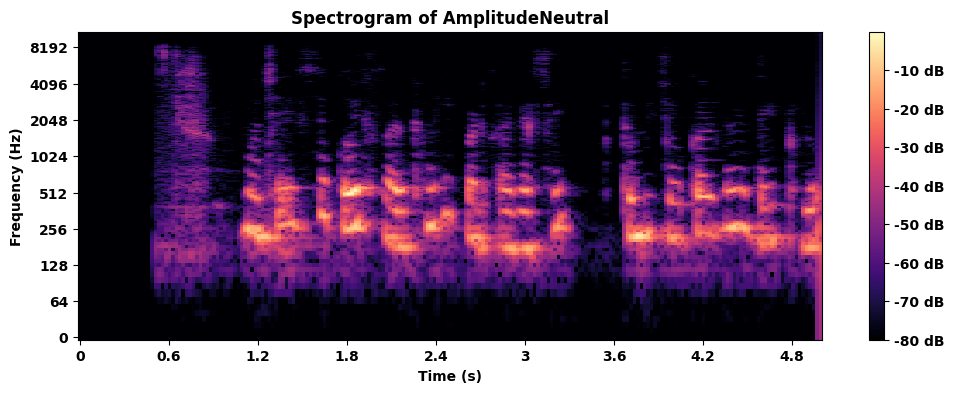

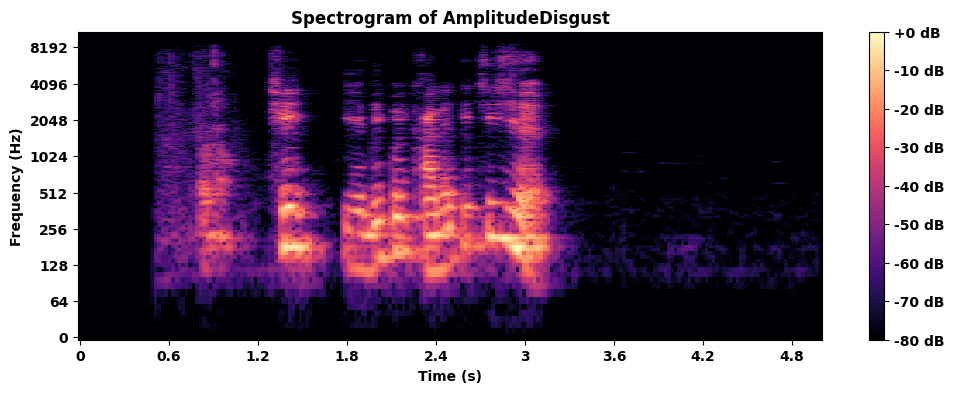

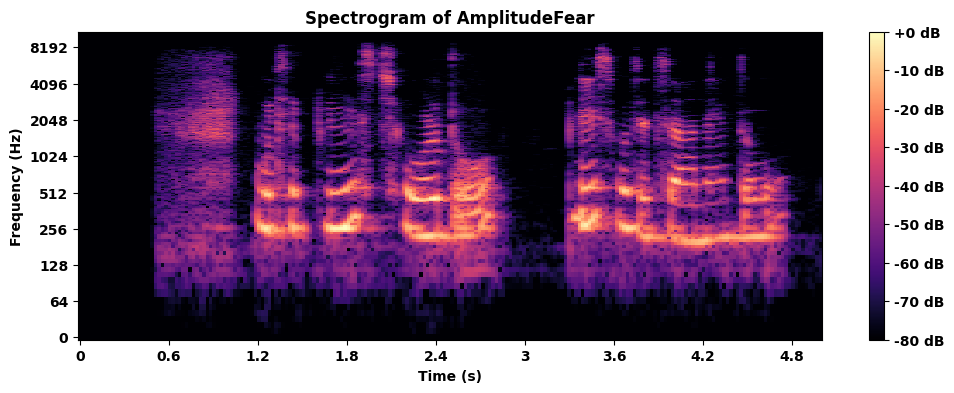

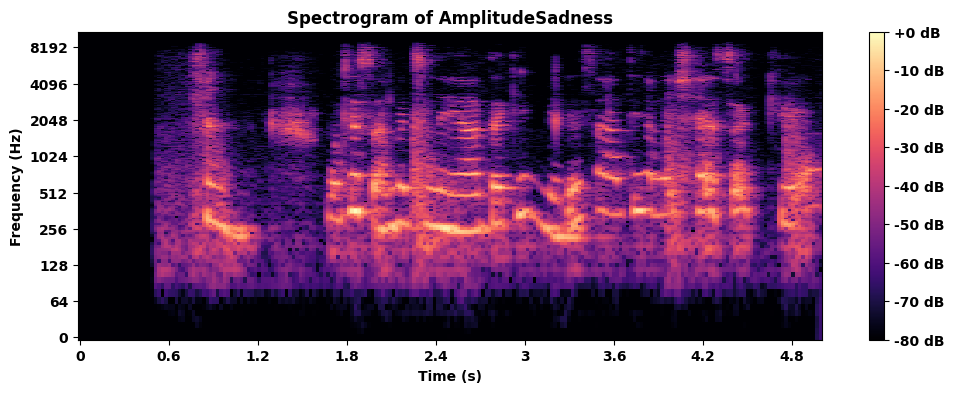

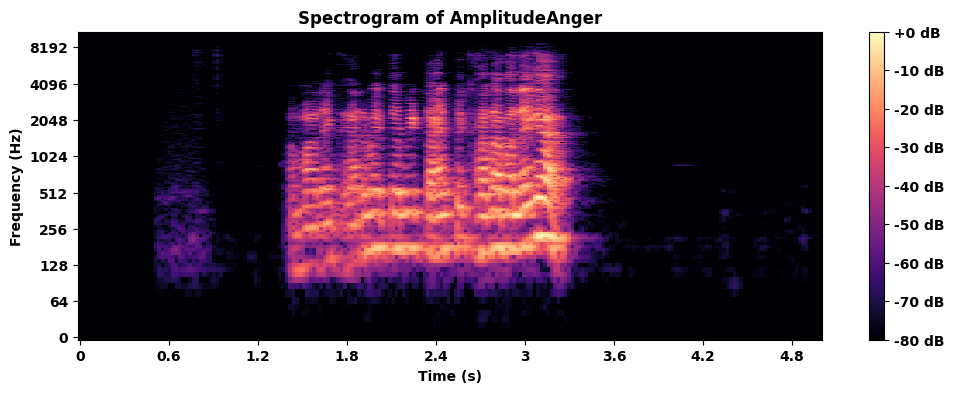

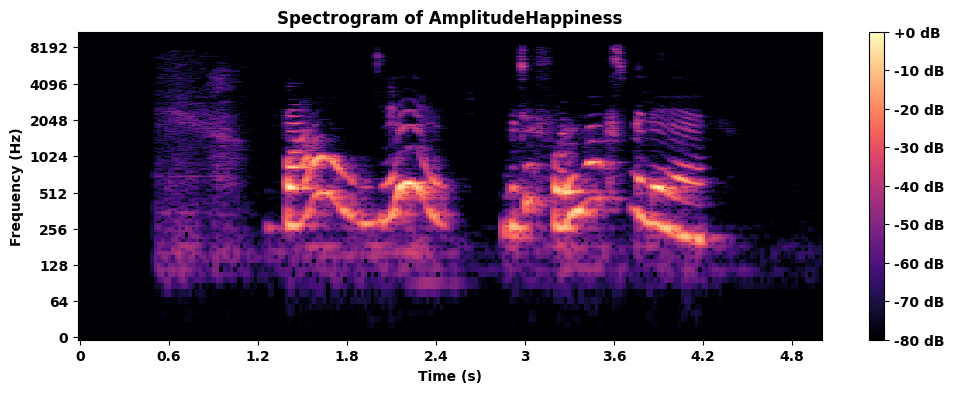

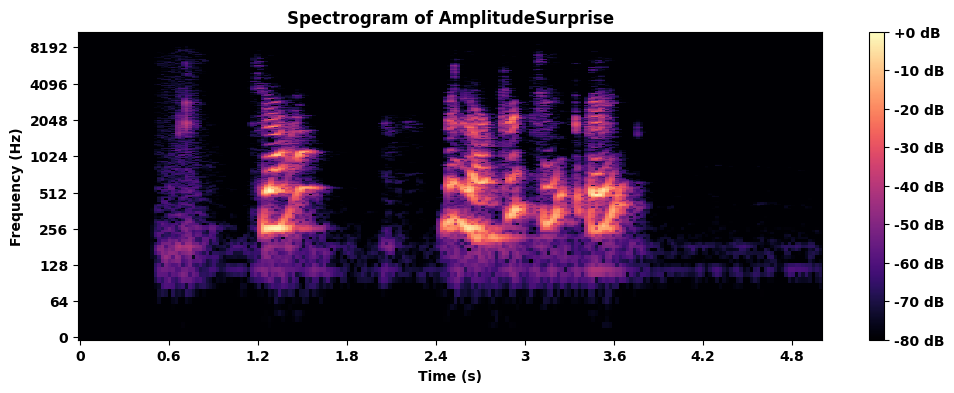

In [109]:
for label in labels:
    for audio in os.listdir(os.path.join(audio_path,label))[-10:-1]:
        path=os.path.join(audio_path,label,audio)
        plot_amplitude(path,label)
        break

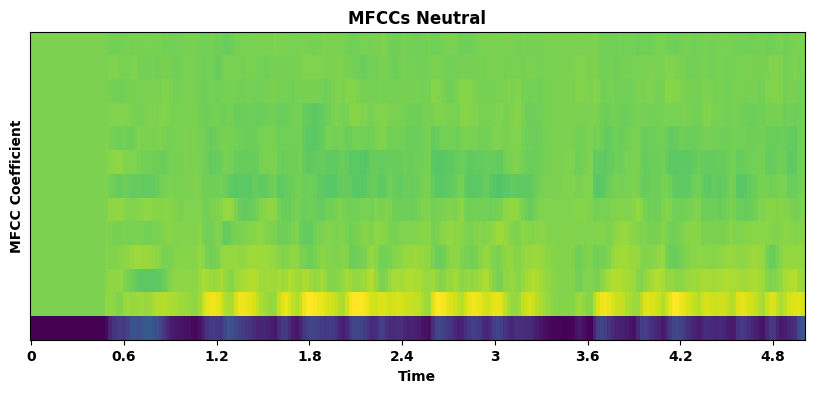

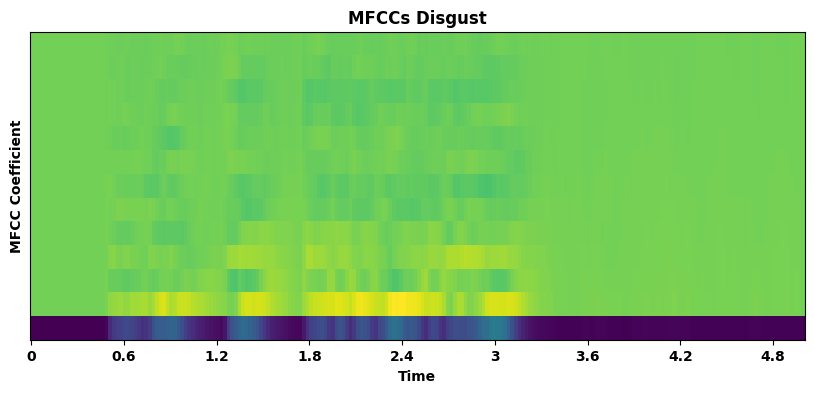

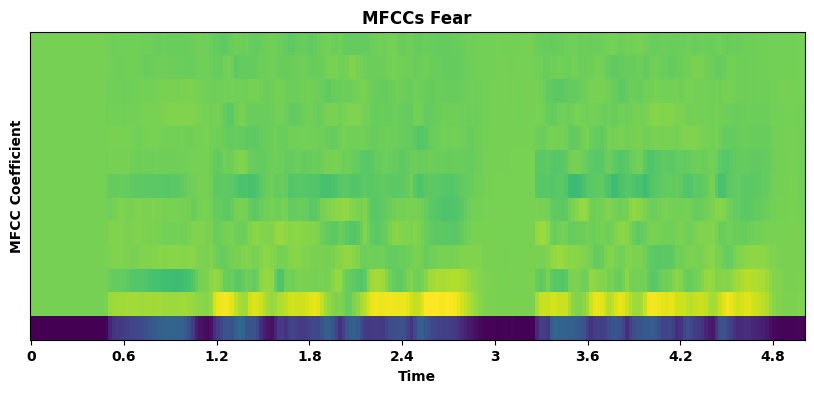

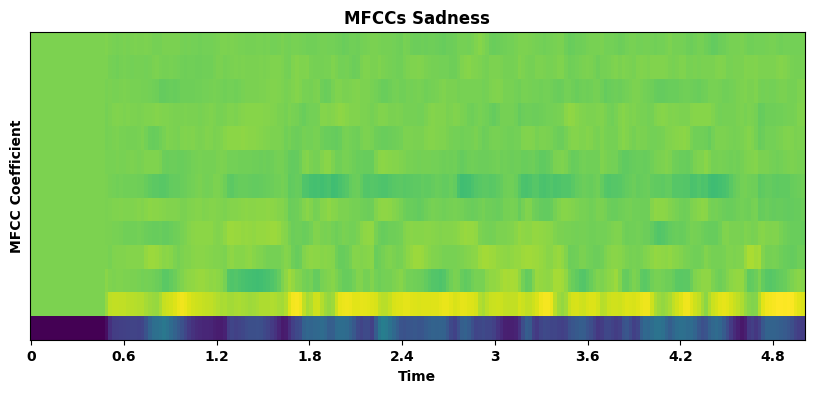

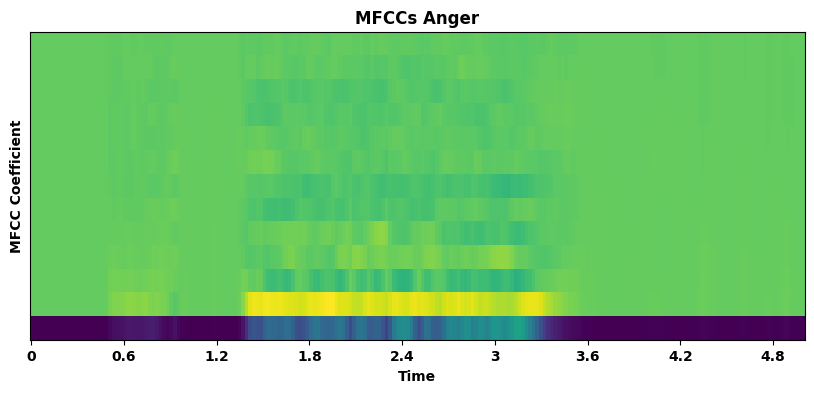

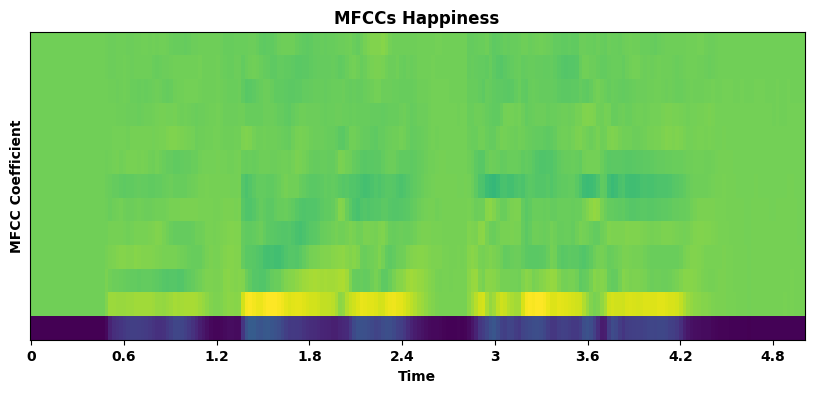

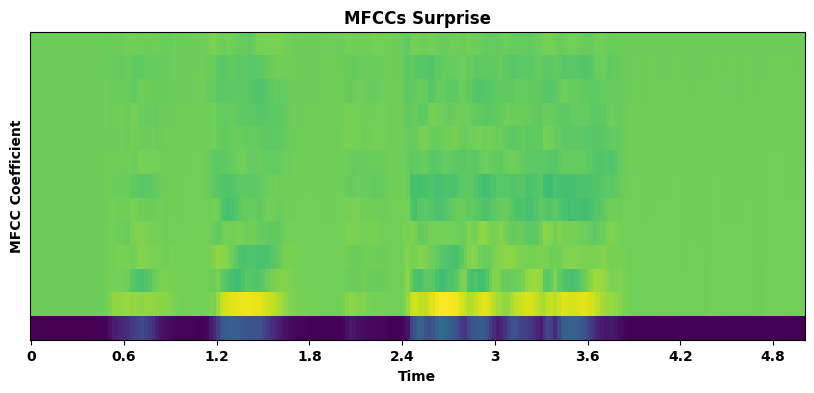

In [110]:
for label in labels:
    for audio in os.listdir(os.path.join(audio_path,label))[-10:-1]:
        path=os.path.join(audio_path,label,audio)
        plot_mfcc(path,label)
        break

In [69]:
def visualize_emotion_features(audio_file_path):
    # Load audio file
    y, sr = librosa.load(audio_file_path)

    # Extract features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    # Plot features
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.plot(spectral_centroid, label='Spectral Centroid', color='b')
    plt.title('Spectral Centroid')
    plt.legend()

    plt.subplot(1, 3, 2)
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Feature')
    
    plt.subplot(1, 3, 3)
    librosa.display.specshow(mfccs, x_axis='time', cmap='viridis')
    plt.colorbar()
    plt.title('MFCCs')

    plt.tight_layout()
    plt.show()

Neutral


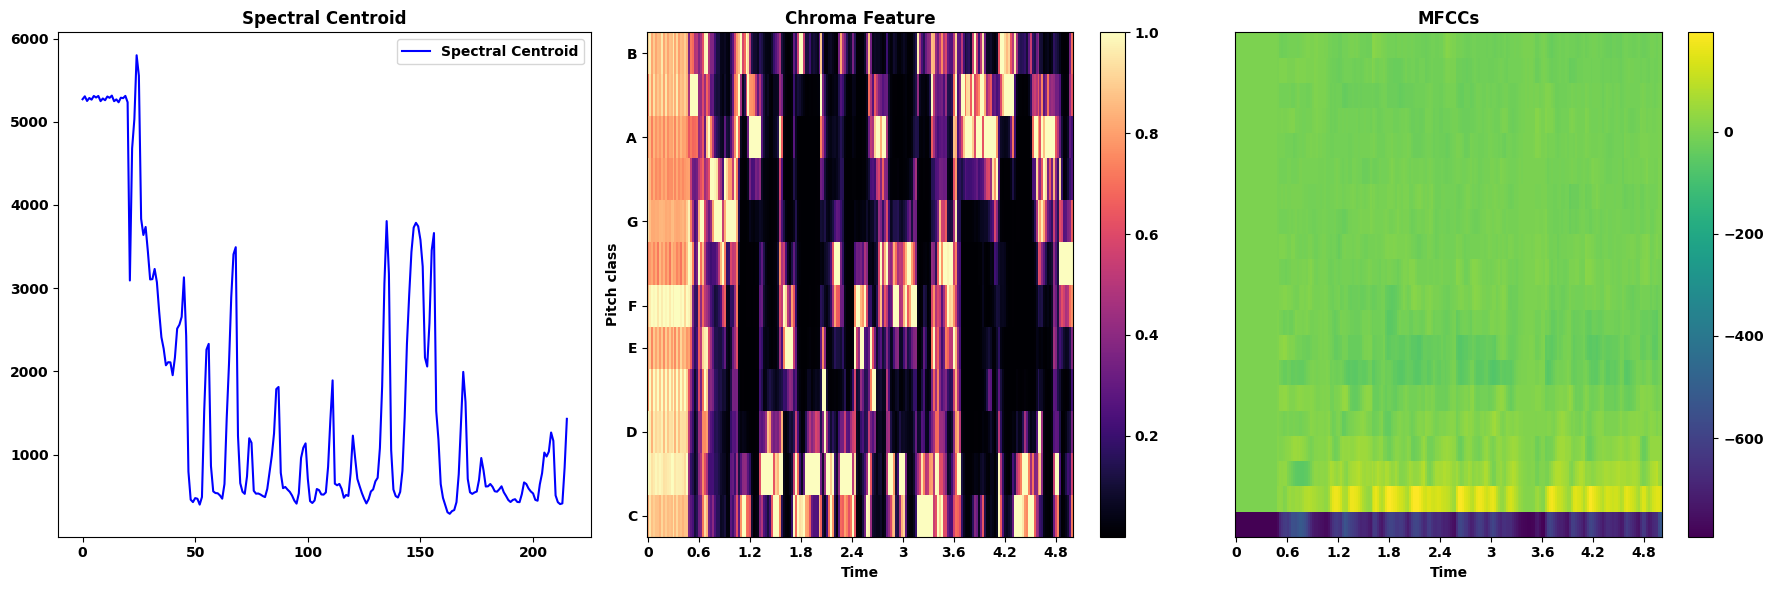

Disgust


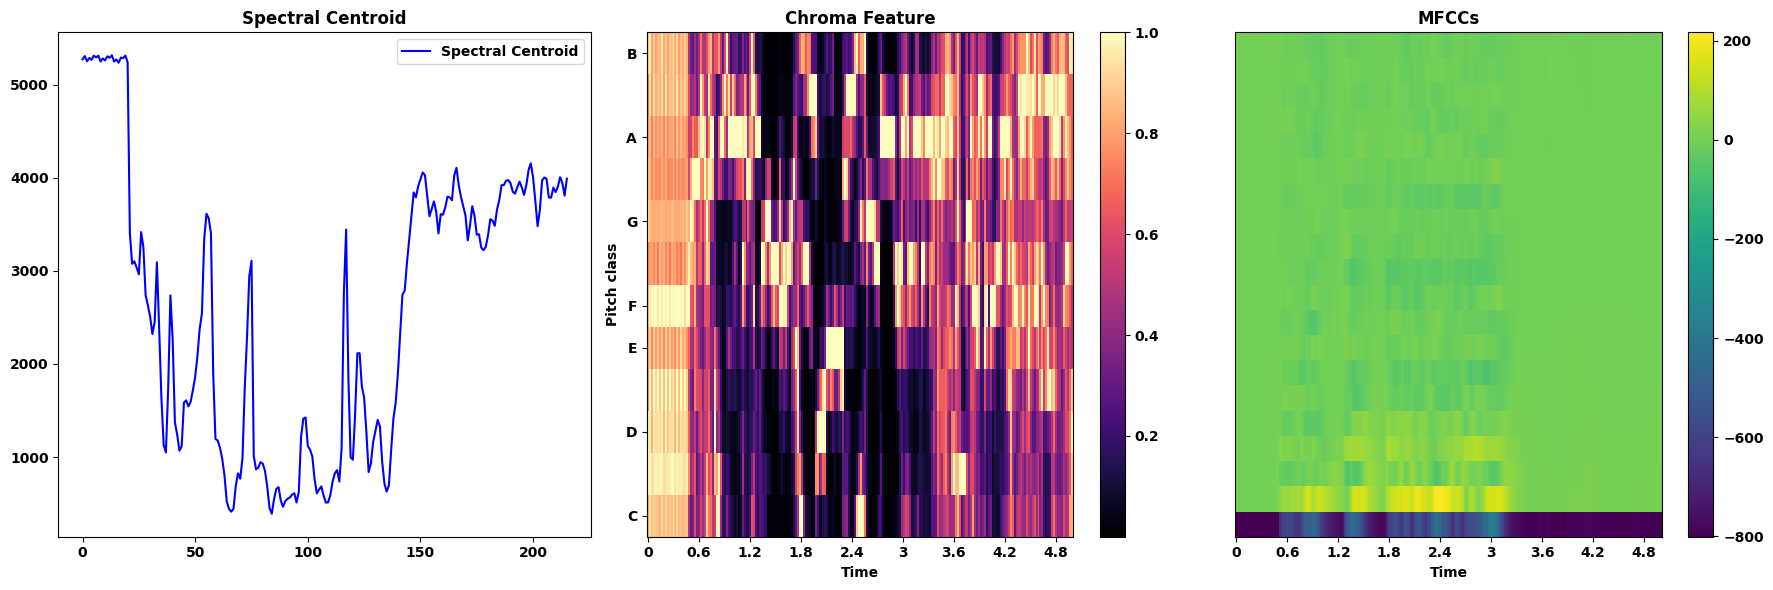

Fear


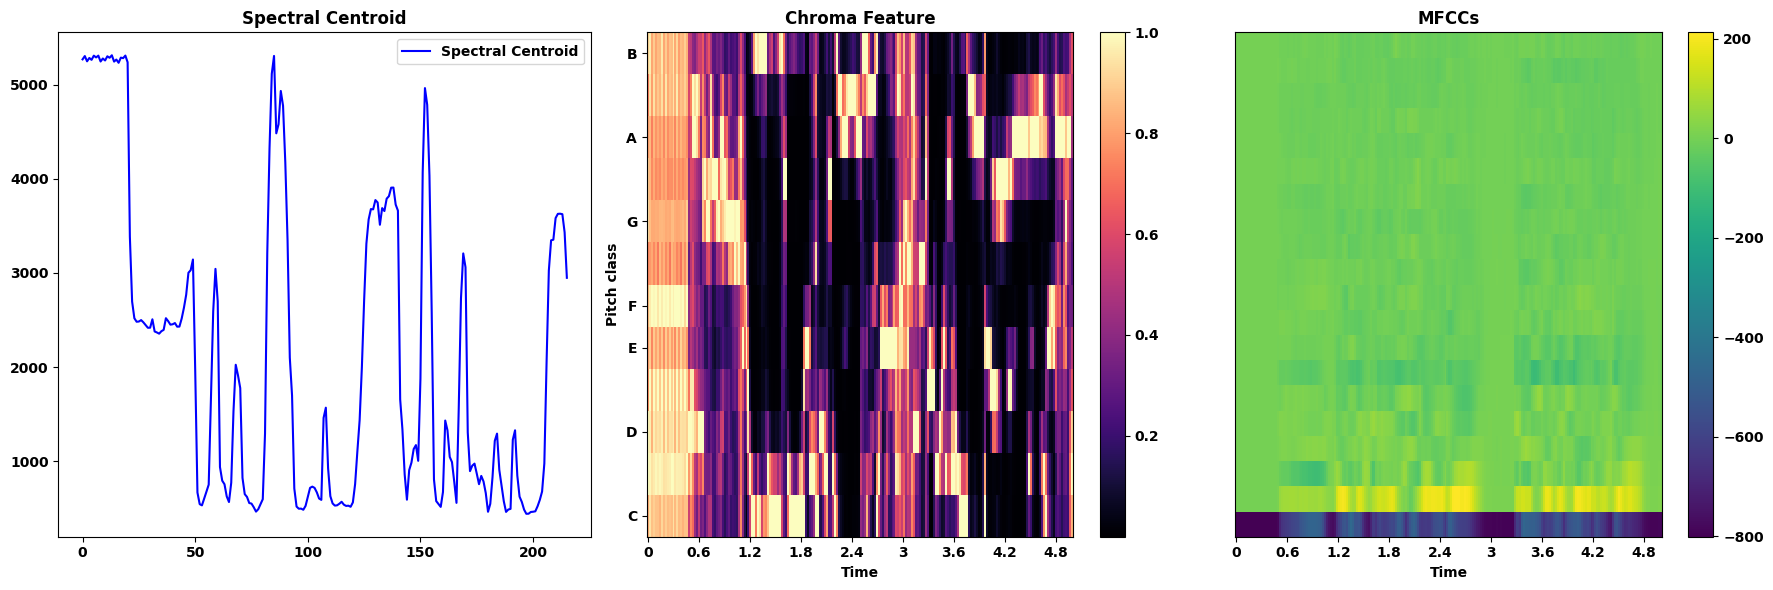

Sadness


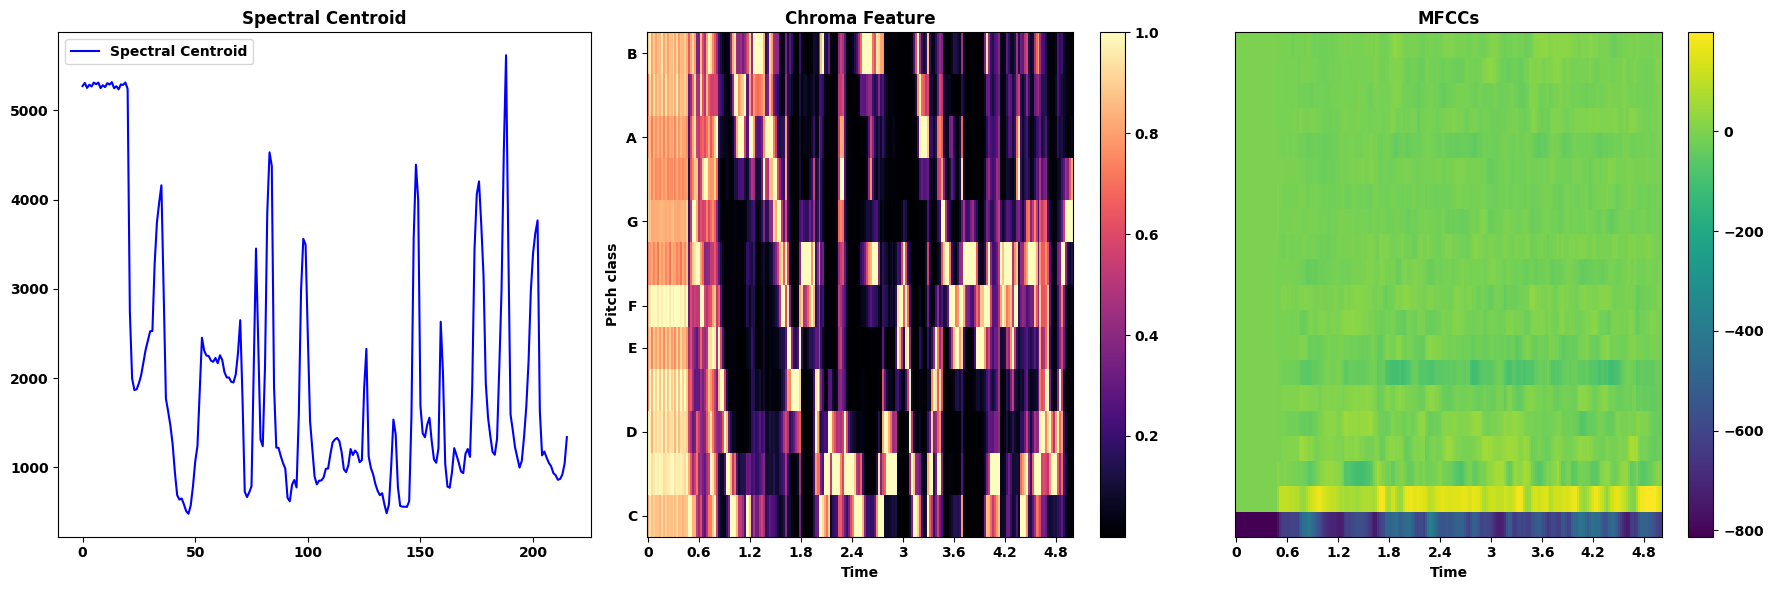

Anger


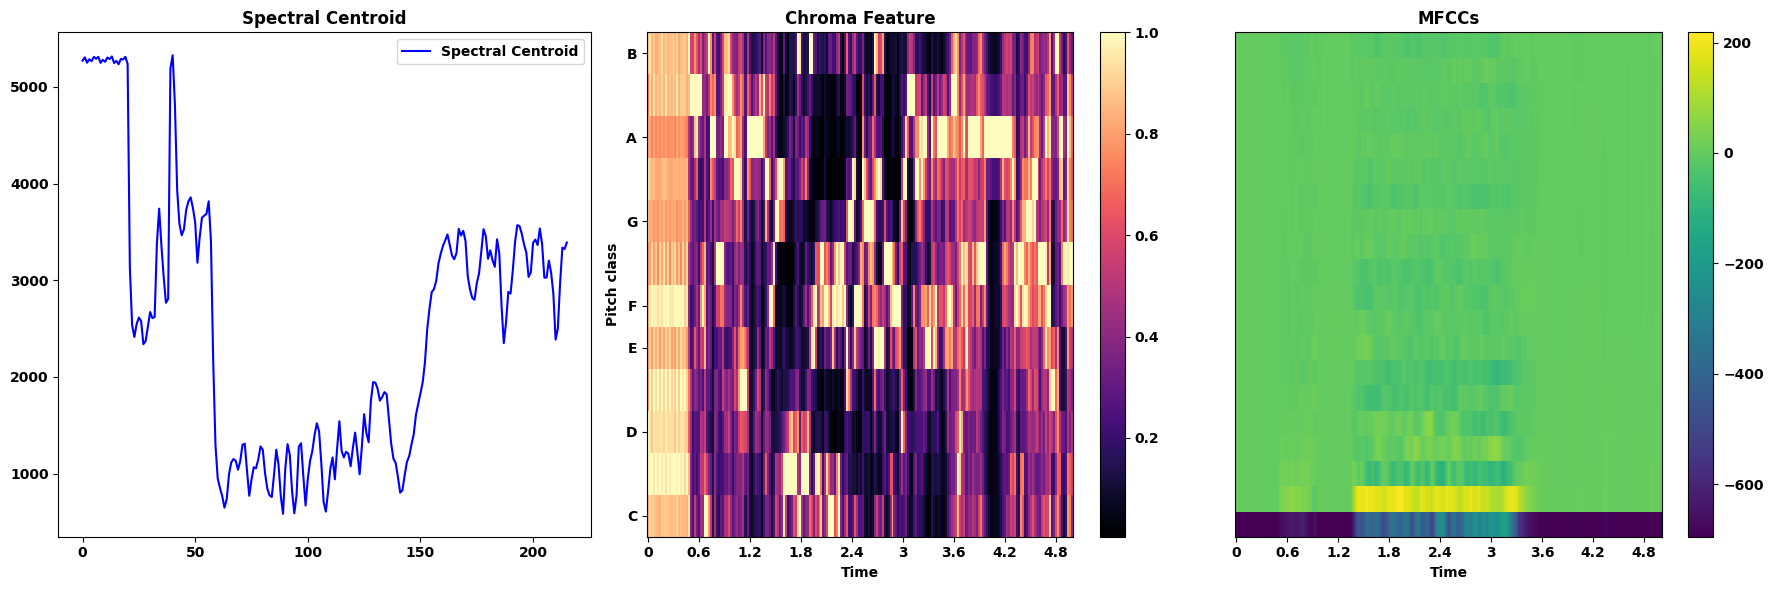

Happiness


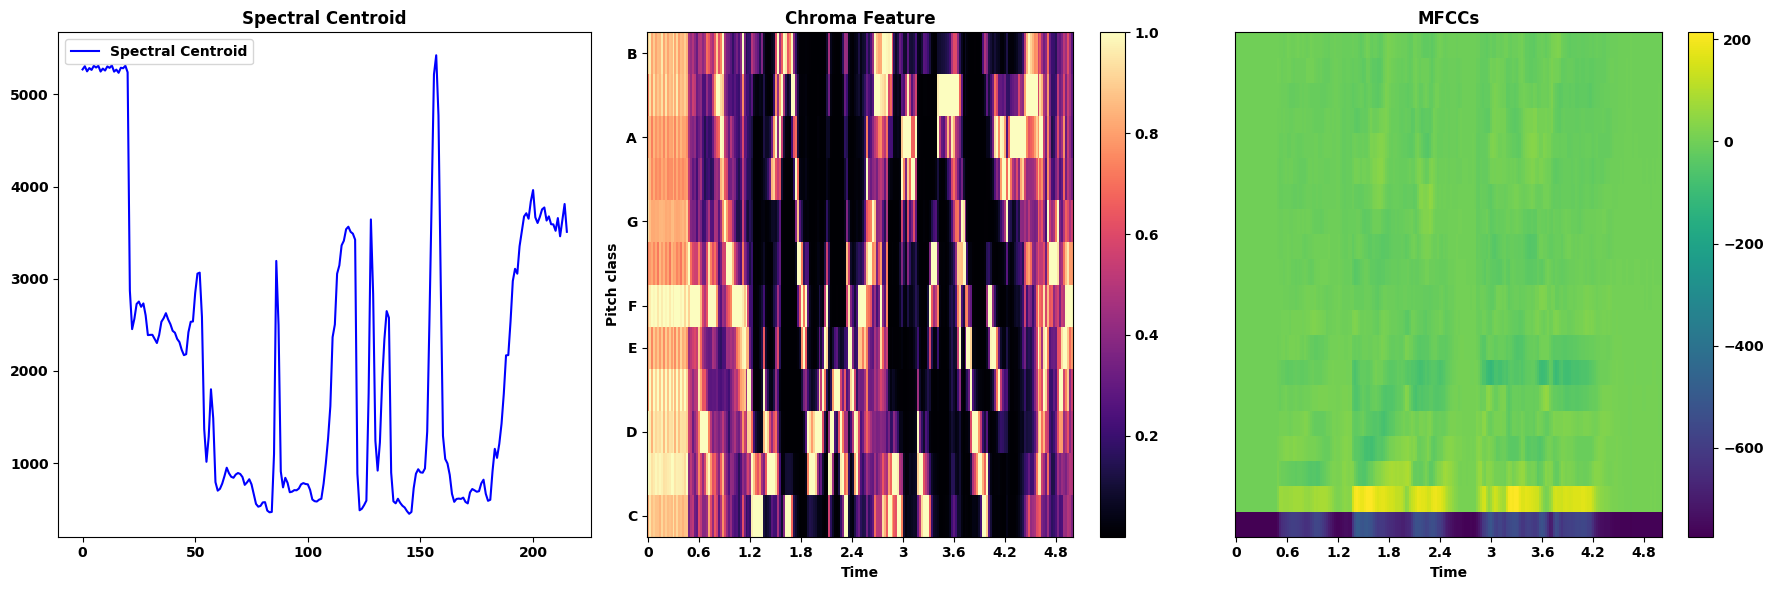

Surprise


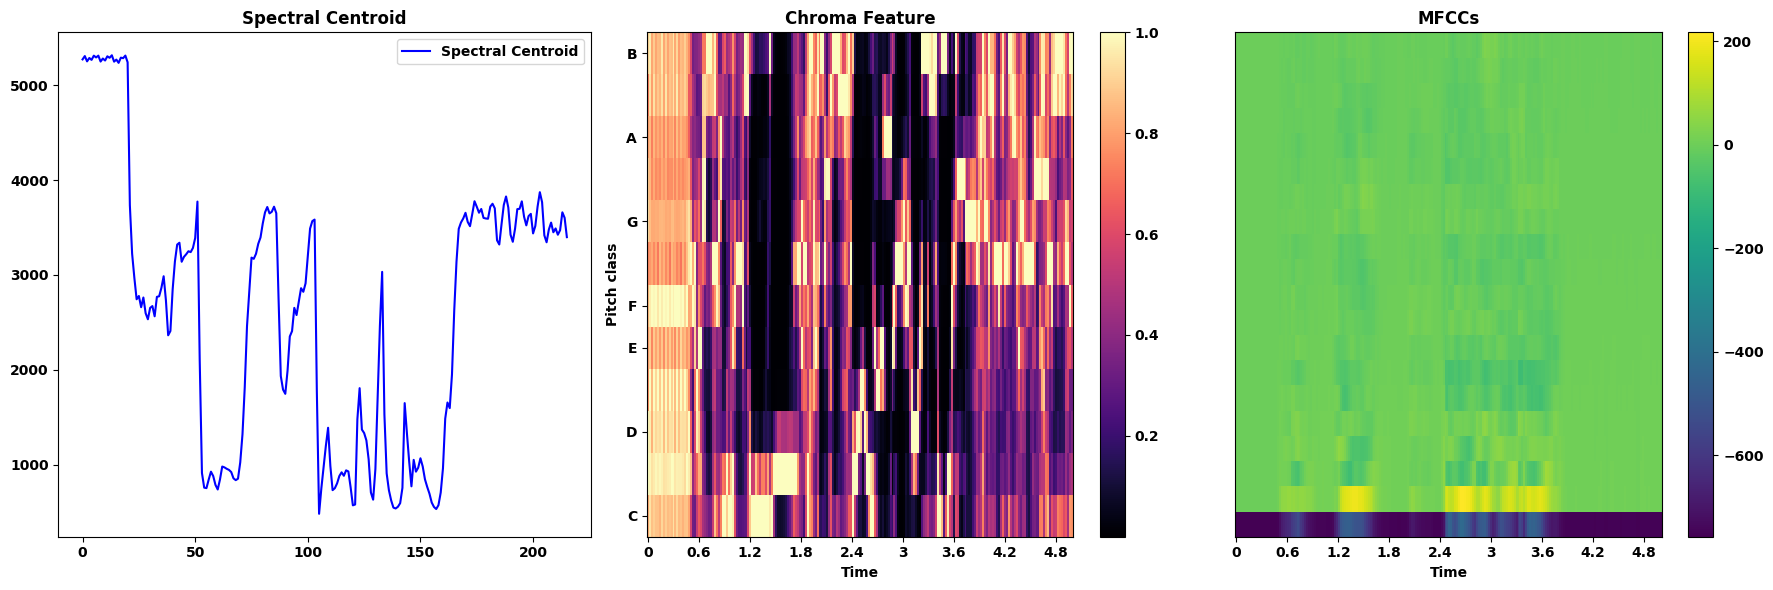

In [111]:
# labels=['Neutral','Happiness']
for label in labels:
    for audio in os.listdir(os.path.join(audio_path,label))[-10:-1]:
        print(label)
        path=os.path.join(audio_path,label,audio)
        visualize_emotion_features(path)
        break

Neutral-Dheeraj-4.wav
Neutral


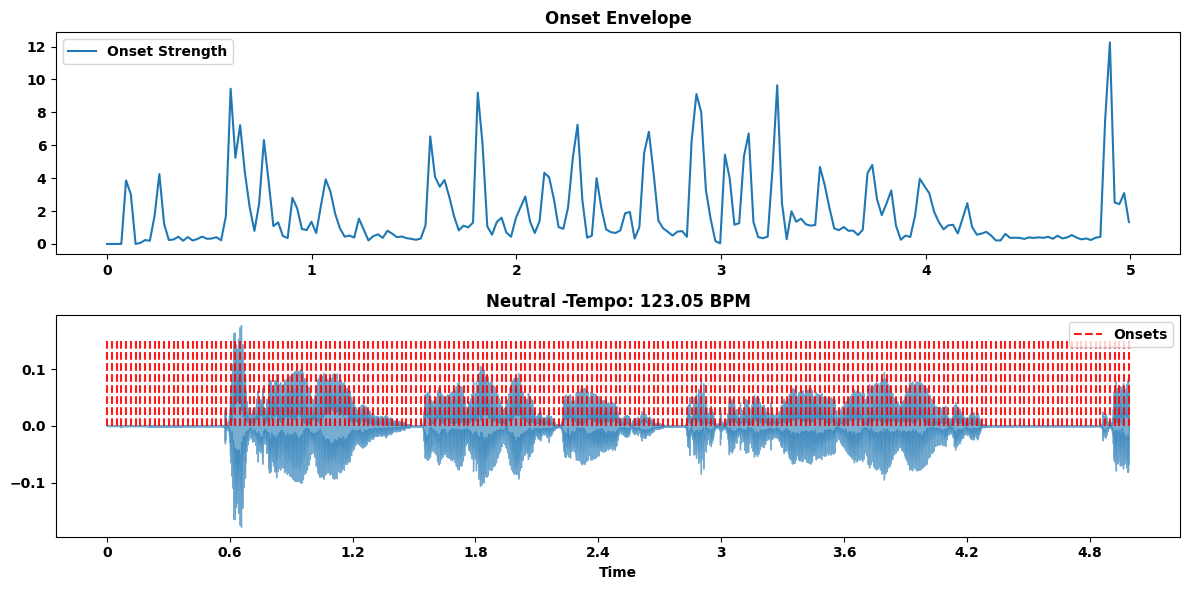

Disgust-Dheeraj-5.wav
Disgust


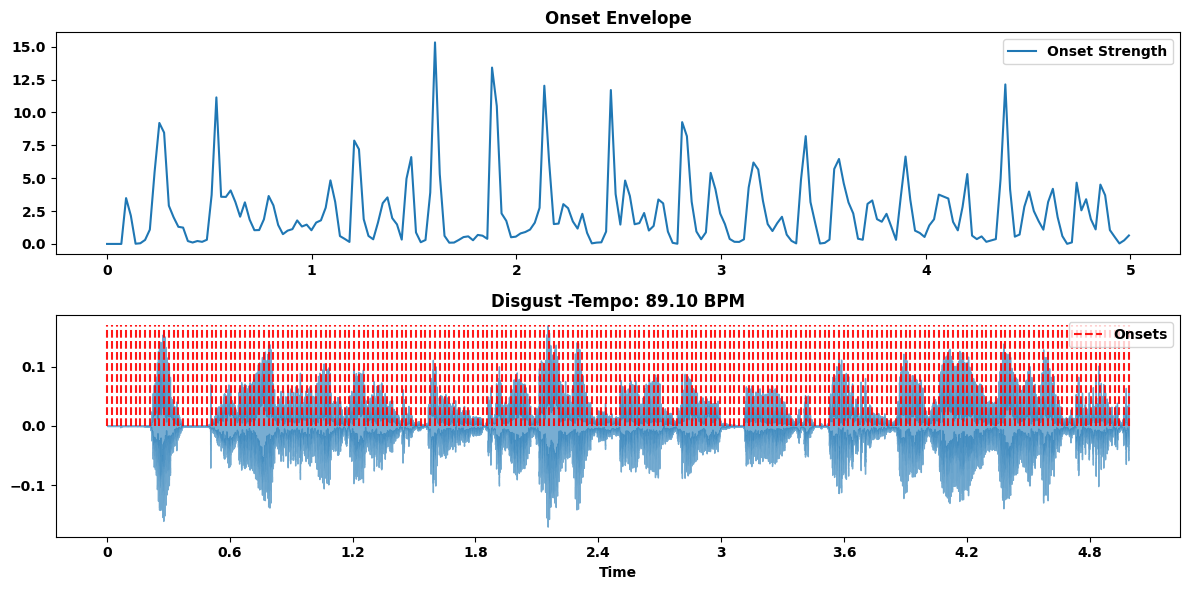

Fear-Dheeraj-4.wav
Fear


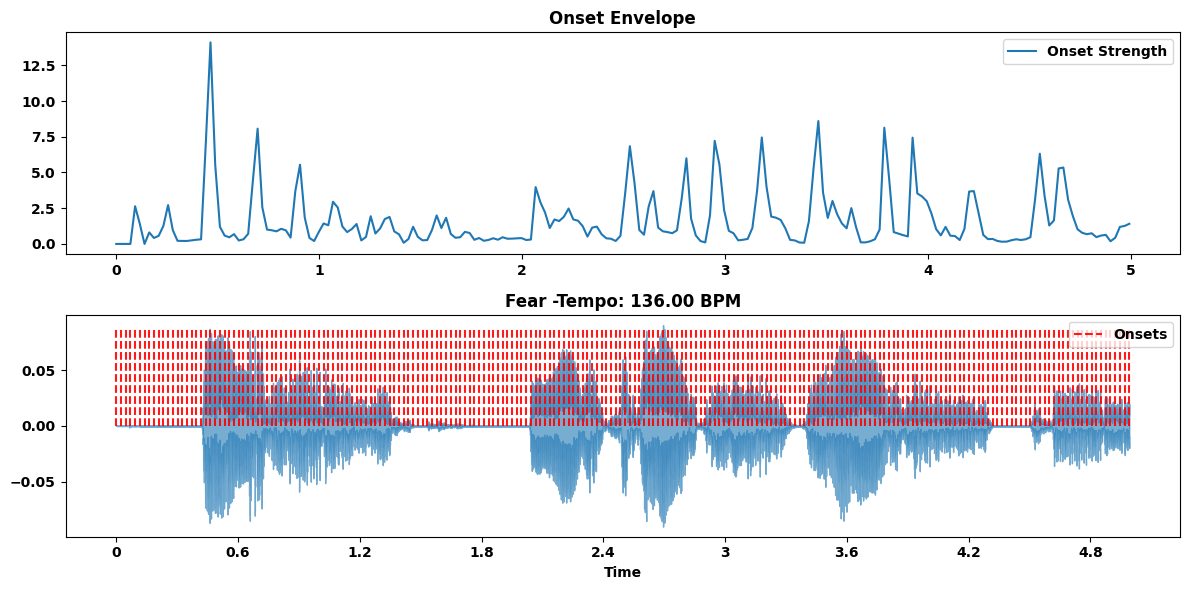

Sadness-Dheeraj-4.wav
Sadness


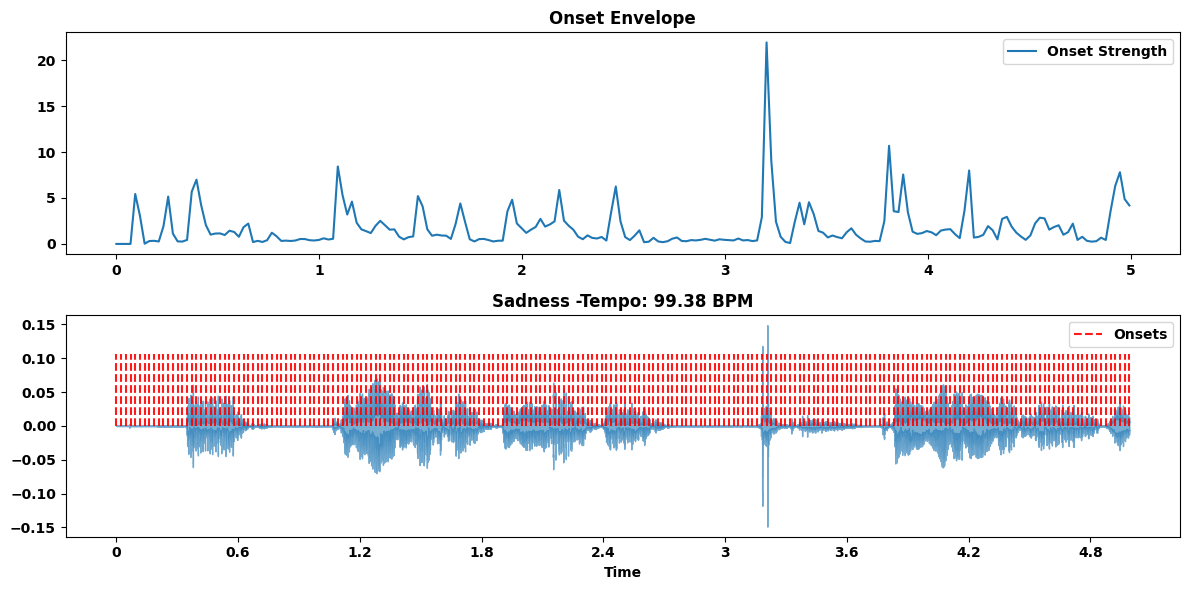

Anger-Dheeraj-5.wav
Anger


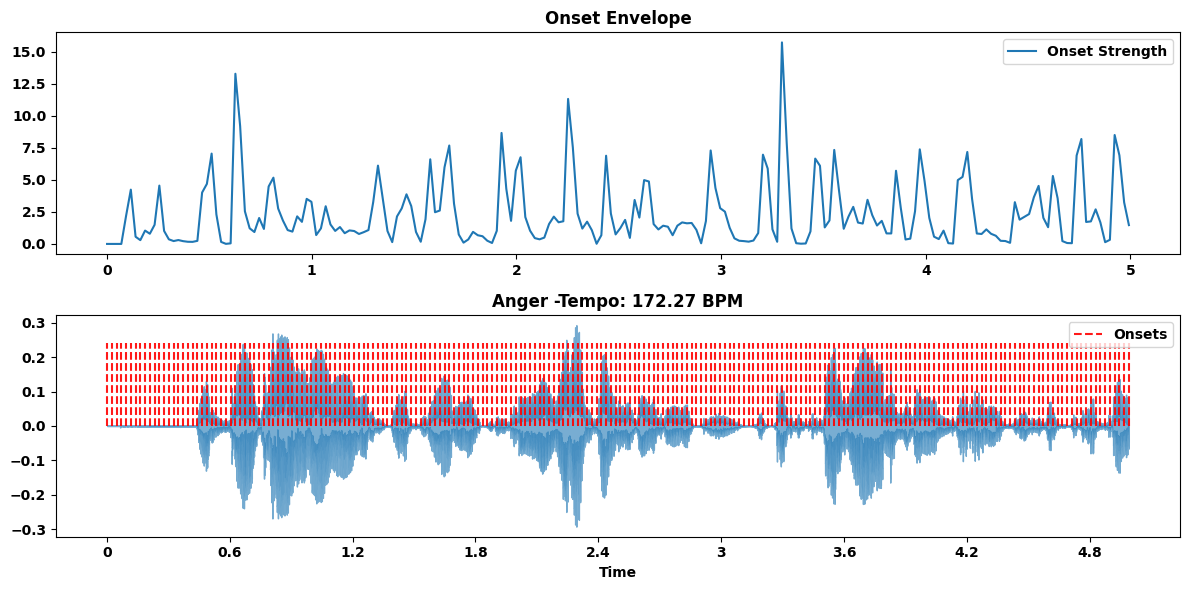

Happiness-Dheeraj-4.wav
Happiness


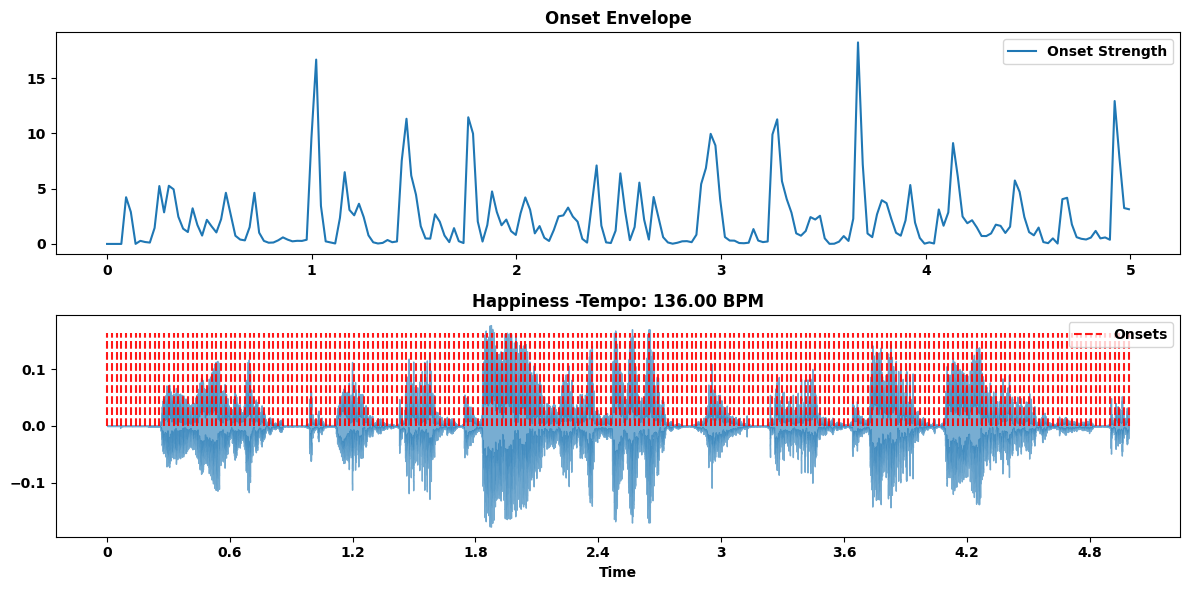

Surprise-Dheeraj-4.wav
Surprise


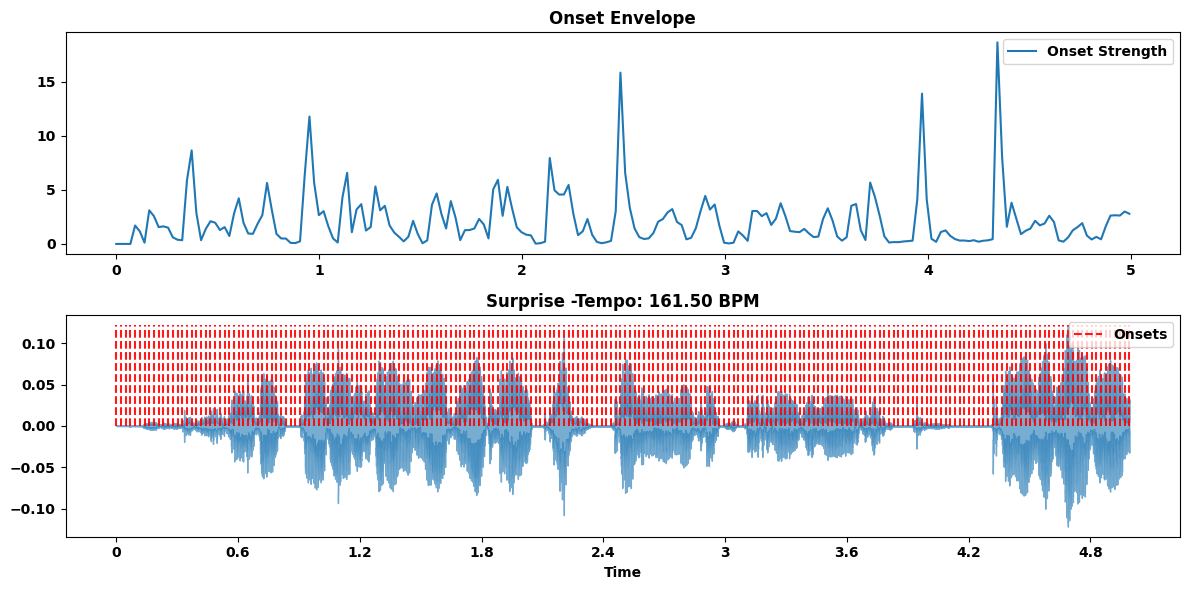

In [112]:

for label in labels:
    for audio in os.listdir(os.path.join(audio_path,label))[-17:-1]:
        print(audio)
        print(label)
        path=os.path.join(audio_path,label,audio)
        plot_tempo(path,label)
        break

In [118]:
dct={}
for i in labels:
    dct[i]=[]
for label in labels:
    print(label)
    min1=1000
    max1=0
    for audio in os.listdir(os.path.join(audio_path,label)):
        y, sr = librosa.load(os.path.join(audio_path,label,audio))
        # Estimate tempo
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
        if tempo<min1:
            min1=tempo
        else:
            max1=tempo
    dct[label].append([int(min1),int(max1)])
dct

Neutral
Disgust
Fear
Sadness
Anger
Happiness
Surprise


{'Neutral': [[78, 129]],
 'Disgust': [[61, 135]],
 'Fear': [[63, 107]],
 'Sadness': [[73, 129]],
 'Anger': [[61, 123]],
 'Happiness': [[80, 151]],
 'Surprise': [[71, 112]]}